Với các hàm cần sử dụng backend Keras mà bị lỗi K not contribute cần đổi về keras==2.2.4




In [1]:
'''function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,10000)'''

'function ClickConnect(){\nconsole.log("Working"); \ndocument.querySelector("colab-toolbar-button#connect").click() \n}\nsetInterval(ClickConnect,10000)'

In [2]:
#pip install keras==2.2.5

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
#code= 4/vgFPcExNkBBqwVDyYn-OAZmlnHJLNNrU5_-3V2eaaDYhjrml0gm18VU

Mounted at /content/drive


# Get Data

In [4]:
#from zipfile import *
#with ZipFile('/content/drive/MyDrive/Pix2Pix-for-Semantic-Segmentation-of-Satellite-Images/Dataset/isic2017/ISIC-2017_Training_Data.zip', 'r') as tt:
  #tt.extractall("")

In [5]:
#ISIC-2017_Training_Part1_GroundTruth.zip
#with ZipFile('/content/drive/MyDrive/Pix2Pix-for-Semantic-Segmentation-of-Satellite-Images/Dataset/isic2017/ISIC-2017_Training_Part1_GroundTruth.zip', 'r') as tt:
  #tt.extractall("")

In [6]:
#test image
#with ZipFile('/content/drive/MyDrive/Pix2Pix-for-Semantic-Segmentation-of-Satellite-Images/Dataset/isic2017/ISIC-2017_Test_v2_Data.zip', 'r') as tt:
  #tt.extractall("")

In [7]:
#test mask
#with ZipFile('/content/drive/MyDrive/Pix2Pix-for-Semantic-Segmentation-of-Satellite-Images/Dataset/isic2017/ISIC-2017_Test_v2_Part1_GroundTruth.zip', 'r') as tt:
  #tt.extractall("")

#Note
Phần bên trên là lấy data trực tiếp từ mount 

Phần bên dứoi là lấy data qua googleAuth nên sẽ lâu hơn

In [8]:
'''from zipfile import ZipFile
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)'''

'from zipfile import ZipFile\n!pip install -U -q PyDrive\nfrom pydrive.auth import GoogleAuth\nfrom pydrive.drive import GoogleDrive\nfrom google.colab import auth\nfrom oauth2client.client import GoogleCredentials\nauth.authenticate_user()\ngauth = GoogleAuth()\ngauth.credentials = GoogleCredentials.get_application_default()\ndrive = GoogleDrive(gauth)'

In [9]:
'''file_id = '1m0u6Ic9ZoF-FS-_HRfIHKMdxNXztWLe7'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('ISIC2017')
with ZipFile('ISIC2017', 'r') as tt:
  tt.extractall("")'''

'file_id = \'1m0u6Ic9ZoF-FS-_HRfIHKMdxNXztWLe7\'\ndownloaded = drive.CreateFile({\'id\': file_id})\ndownloaded.GetContentFile(\'ISIC2017\')\nwith ZipFile(\'ISIC2017\', \'r\') as tt:\n  tt.extractall("")'

In [10]:
'''file_id = '1TPLVTEzAgEcFFM2KJ5ijaCzW1oY6a_wX'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('training_mask')
with ZipFile('training_mask', 'r') as tt:
  tt.extractall("")'''

'file_id = \'1TPLVTEzAgEcFFM2KJ5ijaCzW1oY6a_wX\'\ndownloaded = drive.CreateFile({\'id\': file_id})\ndownloaded.GetContentFile(\'training_mask\')\nwith ZipFile(\'training_mask\', \'r\') as tt:\n  tt.extractall("")'

In [11]:
'''file_id = '1Z7BFrqtxm7us2a092St8VKPDOKhud8oh'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('test')
with ZipFile('test', 'r') as tt:
  tt.extractall("")'''

'file_id = \'1Z7BFrqtxm7us2a092St8VKPDOKhud8oh\'\ndownloaded = drive.CreateFile({\'id\': file_id})\ndownloaded.GetContentFile(\'test\')\nwith ZipFile(\'test\', \'r\') as tt:\n  tt.extractall("")'

In [12]:
'''file_id = '1B0u9c3yeu56rtMmpGSxiY27FZ7iFRxDy'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('test_mask')
with ZipFile('test_mask', 'r') as tt:
  tt.extractall("")'''

'file_id = \'1B0u9c3yeu56rtMmpGSxiY27FZ7iFRxDy\'\ndownloaded = drive.CreateFile({\'id\': file_id})\ndownloaded.GetContentFile(\'test_mask\')\nwith ZipFile(\'test_mask\', \'r\') as tt:\n  tt.extractall("")'

In [13]:
import numpy as np
from matplotlib import pyplot as plt
import os
from pathlib import Path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects
import cv2

In [14]:
import csv
img_name=[]
with open('/content/drive/MyDrive/Pix2Pix-for-Semantic-Segmentation-of-Satellite-Images/Dataset/ISIC-2017_Training_Data/ISIC-2017_Training_Data_metadata.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        img_name.append(row[0])
        
        
csvFile.close()

In [15]:
file_name = 'weights_save'
if not os.path.exists(file_name):
  os.mkdir(file_name)


In [16]:
def get_mask(image_name,mask_folder):
    mask_path=os.path.join(mask_folder, image_name.replace(".jpg","_segmentation.png"))
    #print(mask_path)
    img_mask = cv2.imread(mask_path,cv2.IMREAD_GRAYSCALE)
    _,img_mask = cv2.threshold(img_mask,127,255,cv2.THRESH_BINARY)
    img_mask = img_mask/255.
    return img_mask

# Initial Data

In [17]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
from keras import  layers
import tensorflow as tf
from keras.models import *
from keras.layers import *
import keras.layers as layers
import keras.models as models
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K
import cv2, re, lmdb
import fnmatch, sys
from keras.preprocessing.image import ImageDataGenerator
seed = 1234
np.random.seed(seed)

lấy các cặp ảnh và mask

ảnh resize về 192x288

mask là binary
đầu ra imgs , masks

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

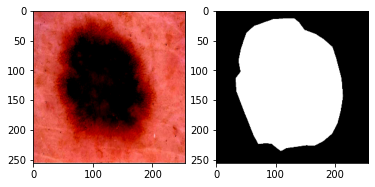

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


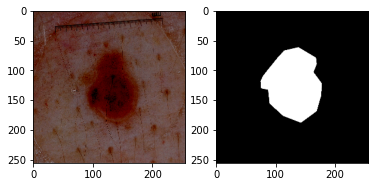

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


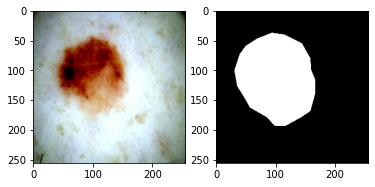

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


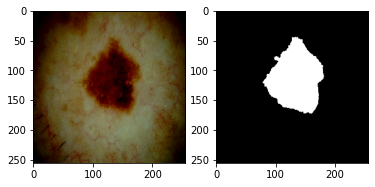

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


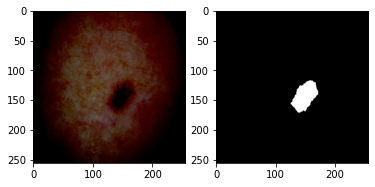

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


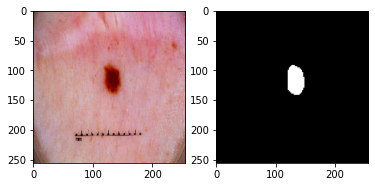

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


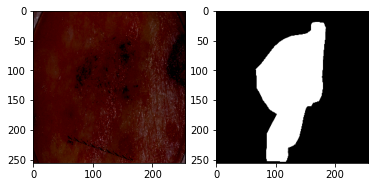

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


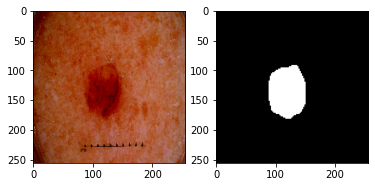

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


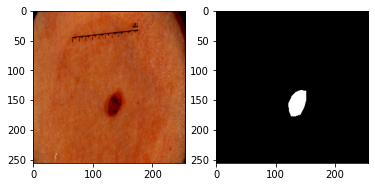

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


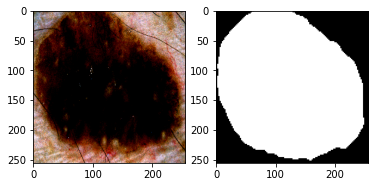

In [18]:
crop_size=300
leng=2000
w=256
h=256
imgs=[]
masks=[]
images=[]
fig=plt.figure()

path="/content/drive/MyDrive/Pix2Pix-for-Semantic-Segmentation-of-Satellite-Images/Dataset/ISIC-2017_Training_Data"
mask_folder="/content/drive/MyDrive/Pix2Pix-for-Semantic-Segmentation-of-Satellite-Images/Dataset/ISIC-2017_Training_Part1_GroundTruth"
for idx in range(1,leng+1):
      file=img_name[idx]
      file+=".jpg"
      fullpath= os.path.join(path,file)
      msk=get_mask(file,mask_folder)
      msk=cv2.resize(msk,(h,w))
      #msk=center_crop(msk,crop_size=crop_size)
      masks.append(msk)
      image=cv2.imread(fullpath)
      #print(np.mean(image))
      if not os.path.exists(fullpath):
        #print("ok")
        continue
      image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      image=image/127.5-1
      image=cv2.resize(image,(h,w))
      #image=center_crop(image,crop_size=crop_size)
      imgs.append(image)
      if idx%200 == 0:
        plt.figure(idx//50)
        plt.subplot(1,2,1).imshow(image,cmap='gray')
        plt.subplot(1,2,2).imshow(msk, cmap = 'gray')
        plt.show()  
imgs=np.asarray(imgs,dtype=np.float)
masks=np.asarray(masks,dtype=np.float)


In [19]:
img_name_test=[]
with open('/content/drive/MyDrive/Pix2Pix-for-Semantic-Segmentation-of-Satellite-Images/Dataset/ISIC-2017_Test_v2_Data/ISIC-2017_Test_v2_Data_metadata.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        img_name_test.append(row[0])
        
        
csvFile.close()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


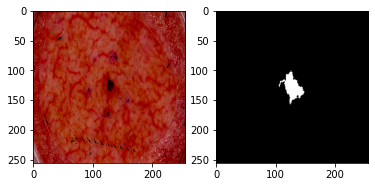

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


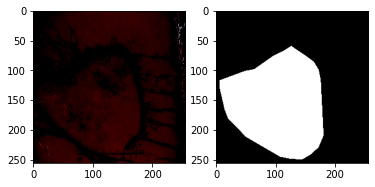

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


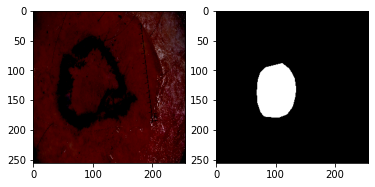

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


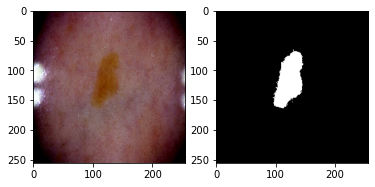

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


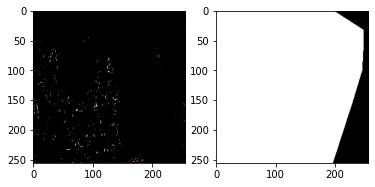

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


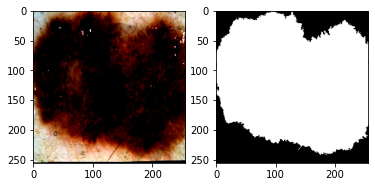

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


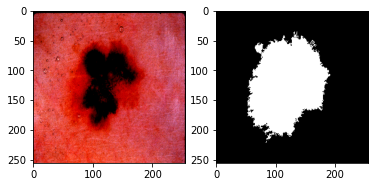

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


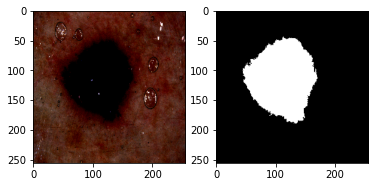

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


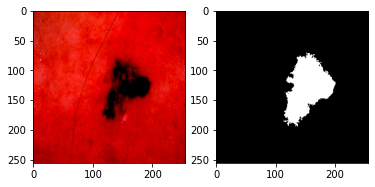

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


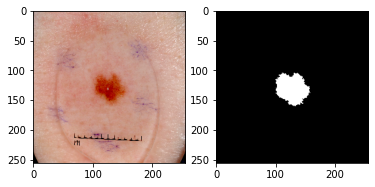

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


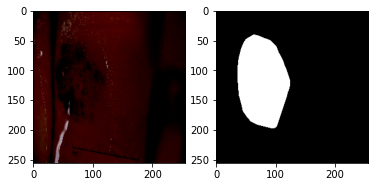

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


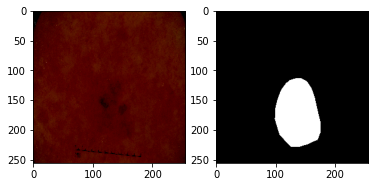

In [20]:
leng=600
imgs_test=[]
masks_test=[]
#images_test=[]
path="/content/drive/MyDrive/Pix2Pix-for-Semantic-Segmentation-of-Satellite-Images/Dataset/ISIC-2017_Test_v2_Data"
mask_folder="/content/drive/MyDrive/Pix2Pix-for-Semantic-Segmentation-of-Satellite-Images/Dataset/ISIC-2017_Test_v2_Part1_GroundTruth"
for idx in range(1,leng+1):
      file=img_name_test[idx]
      file+=".jpg"
      fullpath= os.path.join(path,file)
      msk=get_mask(file,mask_folder)
      msk=cv2.resize(msk,(h,w))
      #msk=center_crop(msk,crop_size=crop_size)
      masks_test.append(msk)
      image=cv2.imread(fullpath)
      if not os.path.exists(fullpath):
        continue
      #print(idx,np.mean(image))
      #image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      image=image/127.5-1
      image=cv2.resize(image,(h,w))
      #images_test.append(image)
      #images[idx-1]=image
      #image=center_crop(image,crop_size=crop_size)
      imgs_test.append(image)
      if idx%50 == 0:
        plt.figure(idx//50)
        plt.subplot(1,2,1).imshow(image,cmap='gray')
        plt.subplot(1,2,2).imshow(msk, cmap = 'gray')
        plt.show()  
imgs_test=np.asarray(imgs_test,dtype=np.float)
masks_test=np.asarray(masks_test,dtype=np.float)

In [21]:
masks=masks.reshape(masks.shape[0],masks.shape[1],masks.shape[2],1)
masks_test=masks_test.reshape(masks_test.shape[0],masks_test.shape[1],masks_test.shape[2],1)
print(imgs.shape,masks.shape,imgs_test.shape,masks_test.shape)

(2000, 256, 256, 3) (2000, 256, 256, 1) (600, 256, 256, 3) (600, 256, 256, 1)


In [22]:
np.save('/content/drive/MyDrive/brain_mri_segmentation/dataset/x_train_skin_2017.npy', imgs)
np.save('/content/drive/MyDrive/brain_mri_segmentation/dataset/y_train_skin_2017.npy', masks)

In [23]:
np.save('/content/drive/MyDrive/brain_mri_segmentation/dataset/x_test_skin_2017.npy', imgs_test)
np.save('/content/drive/MyDrive/brain_mri_segmentation/dataset/y_test_skin_2017.npy', masks_test)

In [ ]:
np.random.seed(13)
index = np.random.permutation(imgs_test.shape[0])
img_dev=imgs_test[index[:600]]
mask_dev=masks_test[index[:600]]

In [ ]:
import keras
class lr_scheduler(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if epoch == 59 or epoch == 79:
      current_lr = K.eval(self.model.optimizer.lr)
      current_lr = current_lr / 10
      K.set_value(self.model.optimizer.lr, current_lr)
      print(K.eval(self.model.optimizer.lr))

#loss

In [ ]:
from keras.losses import binary_crossentropy
def mvn(tensor):
    '''Performs per-channel spatial mean-variance normalization.'''
    epsilon = 1e-6
    mean = K.mean(tensor, axis=(1,2), keepdims=True)
    std = K.std(tensor, axis=(1,2), keepdims=True)
    mvn = (tensor - mean) / (std + epsilon)
    
    return mvn
def dice_coef(y_true, y_pred, smooth=0.0):
    '''Average dice coefficient per batch.'''
    axes = (1,2,3)
    intersection = K.sum(y_true * y_pred, axis=axes) #AhopM
    summation = K.sum(y_true + y_pred, axis=axes)
    
    return K.mean((2.0 * intersection + smooth) / (summation + smooth), axis=0)


def dice_coef_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred, smooth=10.0)
def bce_dice_loss(y_true, y_pred):
    loss = binary_crossentropy(y_true, y_pred) + dice_coef_loss(y_true, y_pred)
    return loss
def confusion(y_true, y_pred):
    smooth=1
    y_pred_pos = K.clip(y_pred, 0, 1)
    y_pred_neg = 1 - y_pred_pos
    y_pos = K.clip(y_true, 0, 1)
    y_neg = 1 - y_pos
    tp = K.sum(y_pos * y_pred_pos)
    fp = K.sum(y_neg * y_pred_pos)
    fn = K.sum(y_pos * y_pred_neg) 
    prec = (tp + smooth)/(tp+fp+smooth)
    recall = (tp+smooth)/(tp+fn+smooth)
    return prec, recall
def tp(y_true, y_pred):
    smooth = 1
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    y_pos = K.round(K.clip(y_true, 0, 1))
    tp = (K.sum(y_pos * y_pred_pos) + smooth)/ (K.sum(y_pos) + smooth) 
    return tp 
def tn(y_true, y_pred):
    smooth = 1
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    y_pred_neg = 1 - y_pred_pos
    y_pos = K.round(K.clip(y_true, 0, 1))
    y_neg = 1 - y_pos 
    tn = (K.sum(y_neg * y_pred_neg) + smooth) / (K.sum(y_neg) + smooth )
    return tn 
def tversky(y_true, y_pred):
    smooth=0.0
    y_true_pos = K.flatten(y_true)
    y_pred_pos = K.flatten(y_pred)
    true_pos = K.sum(y_true_pos * y_pred_pos)
    false_neg = K.sum(y_true_pos * (1-y_pred_pos))
    false_pos = K.sum((1-y_true_pos)*y_pred_pos)
    alpha = 0.7
    return (true_pos + smooth)/(true_pos + alpha*false_neg + (1-alpha)*false_pos + smooth)
def tversky_loss(y_true, y_pred):
    return 1 - tversky(y_true,y_pred)

def focal_tversky(y_true,y_pred):
    pt_1 = tversky(y_true, y_pred)
    gamma = 0.75
    return K.pow((1-pt_1), gamma)

# Data Augument

In [ ]:
#from itertools import izip
generator_x = ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = True,
    #width_shift_range = 0.2,
    #height_shift_range = 0.2,
    #shear_range = 0.1,
    zoom_range = 0.1,
    rotation_range = 180,
    #fill_mode = 'reflect',
    #brightness_range = (0.9,1.1),
)
generator_y = ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = True,
    #width_shift_range = 0.2,
    #height_shift_range = 0.2,
    #shear_range = 0.1,
    zoom_range = 0.1,
    #brightness_range = (1.0,1.0),
    rotation_range = 180,
    #fill_mode = 'reflect'
)
seed = 1234
batch = 4

x_gen = generator_x.flow(imgs, batch_size = batch, shuffle = False, seed = seed)
y_gen = generator_y.flow(masks, batch_size = batch, shuffle = False, seed = seed)
train_generator = zip(x_gen, y_gen)

In [ ]:
from collections import namedtuple
GlobalParams = namedtuple('GlobalParams', ['batch_norm_momentum', 'batch_norm_epsilon', 'dropout_rate', 'num_classes',
                                           'width_coefficient', 'depth_coefficient', 'depth_divisor', 'min_depth',
                                           'drop_connect_rate'])
GlobalParams.__new__.__defaults__ = (None,) * len(GlobalParams._fields)

BlockArgs = namedtuple('BlockArgs', ['kernel_size', 'num_repeat', 'input_filters', 'output_filters', 'expand_ratio',
                                     'id_skip', 'strides', 'se_ratio'])
BlockArgs.__new__.__defaults__ = (None,) * len(BlockArgs._fields)

IMAGENET_WEIGHTS = {

    'efficientnet-b0': {
        'name': 'efficientnet-b0_imagenet_1000.h5',
        'url': 'https://github.com/qubvel/efficientnet/releases/download/v0.0.1/efficientnet-b0_imagenet_1000.h5',
        'md5': 'bca04d16b1b8a7c607b1152fe9261af7',
    },

    'efficientnet-b1': {
        'name': 'efficientnet-b1_imagenet_1000.h5',
        'url': 'https://github.com/qubvel/efficientnet/releases/download/v0.0.1/efficientnet-b1_imagenet_1000.h5',
        'md5': 'bd4a2b82f6f6bada74fc754553c464fc',
    },

    'efficientnet-b2': {
        'name': 'efficientnet-b2_imagenet_1000.h5',
        'url': 'https://github.com/qubvel/efficientnet/releases/download/v0.0.1/efficientnet-b2_imagenet_1000.h5',
        'md5': '45b28b26f15958bac270ab527a376999',
    },

    'efficientnet-b3': {
        'name': 'efficientnet-b3_imagenet_1000.h5',
        'url': 'https://github.com/qubvel/efficientnet/releases/download/v0.0.1/efficientnet-b3_imagenet_1000.h5',
        'md5': 'decd2c8a23971734f9d3f6b4053bf424',
    },

    'efficientnet-b4': {
        'name': 'efficientnet-b4_imagenet_1000.h5',
        'url': 'https://github.com/qubvel/efficientnet/releases/download/v0.0.1/efficientnet-b4_imagenet_1000.h5',
        'md5': '01df77157a86609530aeb4f1f9527949',
    },

    'efficientnet-b5': {
        'name': 'efficientnet-b5_imagenet_1000.h5',
        'url': 'https://github.com/qubvel/efficientnet/releases/download/v0.0.1/efficientnet-b5_imagenet_1000.h5',
        'md5': 'c31311a1a38b5111e14457145fccdf32',
    }

}


def round_filters(filters, global_params):
    """Round number of filters."""
    multiplier = global_params.width_coefficient
    divisor = global_params.depth_divisor
    min_depth = global_params.min_depth
    if not multiplier:
        return filters

    filters *= multiplier
    min_depth = min_depth or divisor
    new_filters = max(min_depth, int(filters + divisor / 2) // divisor * divisor)
    # Make sure that round down does not go down by more than 10%.
    if new_filters < 0.9 * filters:
        new_filters += divisor
    return int(new_filters)


def round_repeats(repeats, global_params):
    """Round number of repeats."""
    multiplier = global_params.depth_coefficient
    if not multiplier:
        return repeats
    return int(math.ceil(multiplier * repeats))


def get_efficientnet_params(model_name, override_params=None):
    """Get efficientnet params based on model name."""
    params_dict = {
        # (width_coefficient, depth_coefficient, resolution, dropout_rate)
        # Note: the resolution here is just for reference, its values won't be used.
        'efficientnet-b0': (1.0, 1.0, 224, 0.2),
        'efficientnet-b1': (1.0, 1.1, 240, 0.2),
        'efficientnet-b2': (1.1, 1.2, 260, 0.3),
        'efficientnet-b3': (1.2, 1.4, 300, 0.3),
        'efficientnet-b4': (1.4, 1.8, 380, 0.3),
        'efficientnet-b5': (1.6, 2.2, 456, 0.3),
        'efficientnet-b6': (1.8, 2.6, 528, 0.5),
        'efficientnet-b7': (2.0, 3.1, 600, 0.5),
    }
    if model_name not in params_dict.keys():
        raise KeyError('There is no model named {}.'.format(model_name))

    width_coefficient, depth_coefficient, _, dropout_rate = params_dict[model_name]

    blocks_args = [
        'r1_k3_s11_e1_i32_o16_se0.25', 'r2_k3_s22_e6_i16_o24_se0.25',
        'r2_k5_s22_e6_i24_o40_se0.25', 'r3_k3_s22_e6_i40_o80_se0.25',
        'r3_k5_s11_e6_i80_o112_se0.25', 'r4_k5_s22_e6_i112_o192_se0.25',
        'r1_k3_s11_e6_i192_o320_se0.25',
    ]
    global_params = GlobalParams(
        batch_norm_momentum=0.99,
        batch_norm_epsilon=1e-3,
        dropout_rate=dropout_rate,
        drop_connect_rate=0.2,
        num_classes=1000,
        width_coefficient=width_coefficient,
        depth_coefficient=depth_coefficient,
        depth_divisor=8,
        min_depth=None)

    if override_params:
        global_params = global_params._replace(**override_params)

    decoder = BlockDecoder()
    return decoder.decode(blocks_args), global_params


class BlockDecoder(object):
    """Block Decoder for readability."""

    @staticmethod
    def _decode_block_string(block_string):
        """Gets a block through a string notation of arguments."""
        assert isinstance(block_string, str)
        ops = block_string.split('_')
        options = {}
        for op in ops:
            splits = re.split(r'(\d.*)', op)
            if len(splits) >= 2:
                key, value = splits[:2]
                options[key] = value

        if 's' not in options or len(options['s']) != 2:
            raise ValueError('Strides options should be a pair of integers.')

        return BlockArgs(
            kernel_size=int(options['k']),
            num_repeat=int(options['r']),
            input_filters=int(options['i']),
            output_filters=int(options['o']),
            expand_ratio=int(options['e']),
            id_skip=('noskip' not in block_string),
            se_ratio=float(options['se']) if 'se' in options else None,
            strides=[int(options['s'][0]), int(options['s'][1])]
        )

    @staticmethod
    def _encode_block_string(block):
        """Encodes a block to a string."""
        args = [
            'r%d' % block.num_repeat,
            'k%d' % block.kernel_size,
            's%d%d' % (block.strides[0], block.strides[1]),
            'e%s' % block.expand_ratio,
            'i%d' % block.input_filters,
            'o%d' % block.output_filters
        ]
        if 0 < block.se_ratio <= 1:
            args.append('se%s' % block.se_ratio)
        if block.id_skip is False:
            args.append('noskip')
        return '_'.join(args)

    def decode(self, string_list):
        """Decodes a list of string notations to specify blocks inside the network.
        Args:
          string_list: a list of strings, each string is a notation of block.
        Returns:
          A list of namedtuples to represent blocks arguments.
        """
        assert isinstance(string_list, list)
        blocks_args = []
        for block_string in string_list:
            blocks_args.append(self._decode_block_string(block_string))
        return blocks_args

    def encode(self, blocks_args):
        """Encodes a list of Blocks to a list of strings.
        Args:
          blocks_args: A list of namedtuples to represent blocks arguments.
        Returns:
          a list of strings, each string is a notation of block.
        """
        block_strings = []
        for block in blocks_args:
            block_strings.append(self._encode_block_string(block))
        return block_strings


class Swish(layers.Layer):
    def __init__(self, name=None, **kwargs):
        super().__init__(name=name, **kwargs)

    def call(self, inputs, **kwargs):
        return tf.nn.swish(inputs)

    def get_config(self):
        config = super().get_config()
        config['name'] = self.name
        return config


def SEBlock(block_args, **kwargs):
    num_reduced_filters = max(
        1, int(block_args.input_filters * block_args.se_ratio))
    filters = block_args.input_filters * block_args.expand_ratio

    spatial_dims = [1, 2]

    try:
        block_name = kwargs['block_name']
    except KeyError:
        block_name = ''

    def block(inputs):
        x = inputs
        x = layers.Lambda(lambda a: K.mean(a, axis=spatial_dims, keepdims=True))(x)
        x = layers.Conv2D(
            num_reduced_filters,
            kernel_size=[1, 1],
            strides=[1, 1],
            kernel_initializer=conv_kernel_initializer,
            padding='same',
            name=block_name + 'se_reduce_conv2d',
            use_bias=True
        )(x)

        x = Swish(name=block_name + 'se_swish')(x)

        x = layers.Conv2D(
            filters,
            kernel_size=[1, 1],
            strides=[1, 1],
            kernel_initializer=conv_kernel_initializer,
            padding='same',
            name=block_name + 'se_expand_conv2d',
            use_bias=True
        )(x)

        x = layers.Activation('sigmoid')(x)
        out = layers.Multiply()([x, inputs])
        return out

    return block


class DropConnect(layers.Layer):

    def __init__(self, drop_connect_rate, **kwargs):
        super().__init__(**kwargs)
        self.drop_connect_rate = drop_connect_rate

    def call(self, inputs, **kwargs):
        def drop_connect():
            keep_prob = 1.0 - self.drop_connect_rate

            # Compute drop_connect tensor
            batch_size = tf.shape(inputs)[0]
            random_tensor = keep_prob
            random_tensor += tf.random.uniform([batch_size, 1, 1, 1], dtype=inputs.dtype)
            binary_tensor = tf.floor(random_tensor)
            output = tf.math.divide(inputs, keep_prob) * binary_tensor
            return output

        return K.in_train_phase(drop_connect(), inputs, training=None)

    def get_config(self):
        config = super().get_config()
        config['drop_connect_rate'] = self.drop_connect_rate
        return config


def conv_kernel_initializer(shape, dtype=K.floatx()):

    kernel_height, kernel_width, _, out_filters = shape
    fan_out = int(kernel_height * kernel_width * out_filters)
    return tf.random.normal(
        shape, mean=0.0, stddev=np.sqrt(2.0 / fan_out), dtype=dtype)


def dense_kernel_initializer(shape, dtype=K.floatx()):
    init_range = 1.0 / np.sqrt(shape[1])
    return tf.random.uniform(shape, -init_range, init_range, dtype=dtype)


def MBConvBlock(block_args, global_params, idx, drop_connect_rate=None):
    filters = block_args.input_filters * block_args.expand_ratio
    batch_norm_momentum = global_params.batch_norm_momentum
    batch_norm_epsilon = global_params.batch_norm_epsilon
    has_se = (block_args.se_ratio is not None) and (0 < block_args.se_ratio <= 1)

    block_name = 'blocks_' + str(idx) + '_'

    def block(inputs):
        x = inputs

        # Expansion phase
        if block_args.expand_ratio != 1:
            expand_conv = layers.Conv2D(filters,
                                        kernel_size=[1, 1],
                                        strides=[1, 1],
                                        kernel_initializer=conv_kernel_initializer,
                                        padding='same',
                                        use_bias=False,
                                        name=block_name + 'expansion_conv2d'
                                        )(x)
            bn0 = layers.BatchNormalization(momentum=batch_norm_momentum,
                                            epsilon=batch_norm_epsilon,
                                            name=block_name + 'expansion_batch_norm')(expand_conv)

            x = Swish(name=block_name + 'expansion_swish')(bn0)

        # Depth-wise convolution phase
        kernel_size = block_args.kernel_size
        depthwise_conv = layers.DepthwiseConv2D(
            [kernel_size, kernel_size],
            strides=block_args.strides,
            depthwise_initializer=conv_kernel_initializer,
            padding='same',
            use_bias=False,
            name=block_name + 'depthwise_conv2d'
        )(x)
        bn1 = layers.BatchNormalization(momentum=batch_norm_momentum,
                                        epsilon=batch_norm_epsilon,
                                        name=block_name + 'depthwise_batch_norm'
                                        )(depthwise_conv)
        x = Swish(name=block_name + 'depthwise_swish')(bn1)

        if has_se:
            x = SEBlock(block_args, block_name=block_name)(x)

        # Output phase
        project_conv = layers.Conv2D(
            block_args.output_filters,
            kernel_size=[1, 1],
            strides=[1, 1],
            kernel_initializer=conv_kernel_initializer,
            padding='same',
            name=block_name + 'output_conv2d',
            use_bias=False)(x)
        x = layers.BatchNormalization(momentum=batch_norm_momentum,
                                      epsilon=batch_norm_epsilon,
                                      name=block_name + 'output_batch_norm'
                                      )(project_conv)
        if block_args.id_skip:
            if all(
                    s == 1 for s in block_args.strides
            ) and block_args.input_filters == block_args.output_filters:
                # only apply drop_connect if skip presents.
                if drop_connect_rate:
                    x = DropConnect(drop_connect_rate)(x)
                x = layers.add([x, inputs])

        return x

    return block


def freeze_efficientunet_first_n_blocks(model, n):
    mbblock_nr = 0
    while True:
        try:
            model.get_layer('blocks_{}_output_batch_norm'.format(mbblock_nr))
            mbblock_nr += 1
        except ValueError:
            break

    all_block_names = ['blocks_{}_output_batch_norm'.format(i) for i in range(mbblock_nr)]
    all_block_index = []
    for idx, layer in enumerate(model.layers):
        if layer.name == all_block_names[0]:
            all_block_index.append(idx)
            all_block_names.pop(0)
            if len(all_block_names) == 0:
                break
    n_blocks = len(all_block_index)

    if n <= 0:
        print('n is less than or equal to 0, therefore no layer will be frozen.')
        return
    if n > n_blocks:
        raise ValueError("There are {} blocks in total, n cannot be greater than {}.".format(n_blocks, n_blocks))

    idx_of_last_block_to_be_frozen = all_block_index[n - 1]
    for layer in model.layers[:idx_of_last_block_to_be_frozen + 1]:
        layer.trainable = False


def unfreeze_efficientunet(model):
    for layer in model.layers:
        layer.trainable = True


In [ ]:
__all__ = ['get_model_by_name', 'get_efficientnet_b0_encoder', 'get_efficientnet_b1_encoder',
           'get_efficientnet_b2_encoder', 'get_efficientnet_b3_encoder', 'get_efficientnet_b4_encoder',
           'get_efficientnet_b5_encoder', 'get_efficientnet_b6_encoder', 'get_efficientnet_b7_encoder']


def efficientnet(input_shape, blocks_args_list, global_params):
    batch_norm_momentum = global_params.batch_norm_momentum
    batch_norm_epsilon = global_params.batch_norm_epsilon

    # Stem part
    model_input = layers.Input(shape=input_shape)
    x = layers.Conv2D(
        filters=round_filters(32, global_params),
        kernel_size=[3, 3],
        strides=[2, 2],
        kernel_initializer=conv_kernel_initializer,
        padding='same',
        use_bias=False,
        name='stem_conv2d'
    )(model_input)

    x = layers.BatchNormalization(
        momentum=batch_norm_momentum,
        epsilon=batch_norm_epsilon,
        name='stem_batch_norm'
    )(x)

    x = Swish(name='stem_swish')(x)

    # Blocks part
    idx = 0
    drop_rate = global_params.drop_connect_rate
    n_blocks = sum([blocks_args.num_repeat for blocks_args in blocks_args_list])
    drop_rate_dx = drop_rate / n_blocks

    for blocks_args in blocks_args_list:
        assert blocks_args.num_repeat > 0
        # Update block input and output filters based on depth multiplier.
        blocks_args = blocks_args._replace(
            input_filters=round_filters(blocks_args.input_filters, global_params),
            output_filters=round_filters(blocks_args.output_filters, global_params),
            num_repeat=round_repeats(blocks_args.num_repeat, global_params)
        )

        # The first block needs to take care of stride and filter size increase.
        x = MBConvBlock(blocks_args, global_params, idx, drop_connect_rate=drop_rate_dx * idx)(x)
        idx += 1

        if blocks_args.num_repeat > 1:
            blocks_args = blocks_args._replace(input_filters=blocks_args.output_filters, strides=[1, 1])

        for _ in range(blocks_args.num_repeat - 1):
            x = MBConvBlock(blocks_args, global_params, idx, drop_connect_rate=drop_rate_dx * idx)(x)
            idx += 1

    # Head part
    x = layers.Conv2D(
        filters=round_filters(1280, global_params),
        kernel_size=[1, 1],
        strides=[1, 1],
        kernel_initializer=conv_kernel_initializer,
        padding='same',
        use_bias=False,
        name='head_conv2d'
    )(x)

    x = layers.BatchNormalization(
        momentum=batch_norm_momentum,
        epsilon=batch_norm_epsilon,
        name='head_batch_norm'
    )(x)

    x = Swish(name='head_swish')(x)

    x = layers.GlobalAveragePooling2D(name='global_average_pooling2d')(x)

    if global_params.dropout_rate > 0:
        x = layers.Dropout(global_params.dropout_rate)(x)

    x = layers.Dense(
        global_params.num_classes,
        kernel_initializer=dense_kernel_initializer,
        activation='softmax',
        name='head_dense'
    )(x)

    model = models.Model(model_input, x)

    return model


def get_model_by_name(model_name, input_shape, classes=1000, pretrained=False):
    """Get an EfficientNet model by its name.
    """
    blocks_args, global_params = get_efficientnet_params(model_name, override_params={'num_classes': classes})
    model = efficientnet(input_shape, blocks_args, global_params)

    try:
        if pretrained:
            weights = IMAGENET_WEIGHTS[model_name]
            weights_path = get_file(
                weights['name'],
                weights['url'],
                cache_subdir='models',
                md5_hash=weights['md5'],
            )
            model.load_weights(weights_path)
    except KeyError as e:
        print("NOTE: Currently model {} doesn't have pretrained weights, therefore a model with randomly initialized"
              " weights is returned.".format(e))

    return model


def get_efficientnet_encoder(model_name, input_shape, pretrained=False):
    model = get_model_by_name(model_name, input_shape, pretrained=pretrained)
    encoder = models.Model(model.input, model.get_layer('global_average_pooling2d').output)
    encoder.layers.pop()  # remove GAP layer
    return encoder


def get_efficientnet_b0_encoder(input_shape, pretrained=False):
    return get_efficientnet_encoder('efficientnet-b0', input_shape, pretrained=pretrained)


def get_efficientnet_b1_encoder(input_shape, pretrained=False):
    return get_efficientnet_encoder('efficientnet-b1', input_shape, pretrained=pretrained)


def get_efficientnet_b2_encoder(input_shape, pretrained=False):
    return get_efficientnet_encoder('efficientnet-b2', input_shape, pretrained=pretrained)


def get_efficientnet_b3_encoder(input_shape, pretrained=False):
    return get_efficientnet_encoder('efficientnet-b3', input_shape, pretrained=pretrained)


def get_efficientnet_b4_encoder(input_shape, pretrained=False):
    return get_efficientnet_encoder('efficientnet-b4', input_shape, pretrained=pretrained)


def get_efficientnet_b5_encoder(input_shape, pretrained=False):
    return get_efficientnet_encoder('efficientnet-b5', input_shape, pretrained=pretrained)


def get_efficientnet_b6_encoder(input_shape, pretrained=False):
    return get_efficientnet_encoder('efficientnet-b6', input_shape, pretrained=pretrained)


def get_efficientnet_b7_encoder(input_shape, pretrained=False):
    return get_efficientnet_encoder('efficientnet-b7', input_shape, pretrained=pretrained)


In [ ]:
def BottleNeck1():
  def call(inputs):
    x = Conv2D(inputs.shape[-1],kernel_size=1,padding='same',kernel_initializer='he_normal',use_bias=False)(inputs)
    x = BatchNormalization()(x)
    x = LeakyReLU(0.2)(x)
    x = Conv2D(inputs.shape[-1],kernel_size=1,padding='same',kernel_initializer='he_normal',use_bias=False)(x)
    x = BatchNormalization()(x)
    x  =LeakyReLU(0.2)(x)
    out= x+inputs

    out=BatchNormalization()(out)
    return out
  return call

In [ ]:
__all__ = ['get_efficient_unet_b0', 'get_efficient_unet_b1', 'get_efficient_unet_b2', 'get_efficient_unet_b3',
           'get_efficient_unet_b4', 'get_efficient_unet_b5', 'get_efficient_unet_b6', 'get_efficient_unet_b7',
           'get_blocknr_of_skip_candidates']


def get_blocknr_of_skip_candidates(encoder, verbose=False):
    """
    Get block numbers of the blocks which will be used for concatenation in the Unet.
    :param encoder: the encoder
    :param verbose: if set to True, the shape information of all blocks will be printed in the console
    :return: a list of block numbers
    """
    shapes = []
    candidates = []
    mbblock_nr = 0
    while True:
        try:
            mbblock = encoder.get_layer('blocks_{}_output_batch_norm'.format(mbblock_nr)).output
            shape = int(mbblock.shape[1]), int(mbblock.shape[2])
            if shape not in shapes:
                shapes.append(shape)
                candidates.append(mbblock_nr)
            if verbose:
                print('blocks_{}_output_shape: {}'.format(mbblock_nr, shape))
            mbblock_nr += 1
        except ValueError:
            break
    return candidates


In [ ]:
def ResidualBlock():
  def call(inputs):
    x = inputs
    indim= inputs.shape[-1]
    residual = Conv2D(indim,kernel_size=(3,1),padding='same')(x)
    residual = BatchNormalization()(residual)
    residual = LeakyReLU(0.2)(residual)
    residual = Conv2D(indim,kernel_size=(1,3),padding='same')(residual)
    residual = BatchNormalization()(residual)
    residual = LeakyReLU(0.2)(residual)

    residual = Conv2D(indim,kernel_size=(3,1),padding='same')(residual)
    residual = BatchNormalization()(residual)
    residual = LeakyReLU(0.2)(residual)
    residual = Conv2D(indim,kernel_size=(1,3),padding='same')(residual)
    residual = BatchNormalization()(residual)
    residual = LeakyReLU(0.2)(residual)
    x        = BatchNormalization()(x)
    #residual = Dropout(0.2)(residual)
    out = x+ residual
    
    return out
  return call
#khoi giam kich thuoc skip connection
def dowsample_skip():
  def call(inputs):
      skip_out= Conv2D(inputs.shape[-1],kernel_size=3,strides=1,padding='same',kernel_initializer='he_normal',use_bias=False)(inputs)
      skip_out= BatchNormalization()(skip_out)
      skip_out= Activation('relu')(skip_out)
      skip_out = MaxPooling2D(pool_size=(2,2),strides=2)(skip_out)
      return skip_out
  return call

#xay dung khoi decoder: 
def Conv2DTranspose_block2(filters, transpose_kernel_size=(2, 2), upsample_rate=(2, 2),interpolation='bilinear', skip=None):
  def layer(input_tensor):
    x = Conv2DTranspose(filters, transpose_kernel_size, strides=upsample_rate, padding='same',kernel_initializer = 'he_normal')(input_tensor)
    out = x
    if skip is not None :
      out = Concatenate()([x, skip])
    out=ResidualBlock()(out)
    #out=Dropout(0.2)(out)
    return out
  return layer


In [ ]:
def get_efficient_unet_vs1(encoder, out_channels=2, block_type='upsampling', concat_input=True):
    MBConvBlocks = []
    #lay cac skip connection tu encoder
    skip_candidates = get_blocknr_of_skip_candidates(encoder)

    for mbblock_nr in skip_candidates:
        mbblock = encoder.get_layer('blocks_{}_output_batch_norm'.format(mbblock_nr)).output
        MBConvBlocks.append(mbblock)

    # delete the last block since it won't be used in the process of concatenation
    MBConvBlocks.pop()

    input_ = encoder.input
    head = encoder.get_layer('head_swish').output
    blocks = [input_] + MBConvBlocks + [head]
    #define decoder block
    UpBlock = Conv2DTranspose_block2
    
    #build decoder with double skip connection
    o = blocks.pop()
    o = BottleNeck1()(o)
    o = UpBlock(512, skip=blocks.pop())(o)

    o = UpBlock(256, skip=blocks.pop())(o)


    o = UpBlock(128, skip=blocks.pop())(o)

    o = UpBlock(64,  skip=blocks.pop())(o)

    if concat_input:
        o = UpBlock(32, skip=blocks.pop())(o)
    else:
        o = UpBlock(32)(o)
    o = Conv2D(3, (1, 1), padding='same', kernel_initializer=conv_kernel_initializer,use_bias=False)(o)
    o = BatchNormalization()(o)
    o = LeakyReLU(0.2)(o)
    o = Conv2D(out_channels,(1, 1), padding='same',activation='sigmoid')(o)
    model = models.Model(encoder.input, o)

    return model


In [ ]:
def get_efficient_unet_b0(input_shape, out_channels=2, pretrained=False, block_type='transpose', concat_input=True):
    """Get a Unet model with Efficient-B0 encoder
    :param input_shape: shape of input (cannot have None element)
    :param out_channels: the number of output channels
    :param pretrained: True for ImageNet pretrained weights
    :param block_type: "upsampling" to use UpSampling layer, otherwise use Conv2DTranspose layer
    :param concat_input: if True, input image will be concatenated with the last conv layer
    :return: an EfficientUnet_B0 model
    """
    encoder = get_efficientnet_b0_encoder(input_shape, pretrained=pretrained)
    model = get_efficient_unet_vs1(encoder, out_channels, block_type=block_type, concat_input=concat_input)
    return model
def get_efficient_unet_b1(input_shape, out_channels=2, pretrained=False, block_type='transpose', concat_input=True):
    """Get a Unet model with Efficient-B0 encoder
    :param input_shape: shape of input (cannot have None element)
    :param out_channels: the number of output channels
    :param pretrained: True for ImageNet pretrained weights
    :param block_type: "upsampling" to use UpSampling layer, otherwise use Conv2DTranspose layer
    :param concat_input: if True, input image will be concatenated with the last conv layer
    :return: an EfficientUnet_B0 model
    """
    encoder = get_efficientnet_b1_encoder(input_shape, pretrained=pretrained)
    model = get_efficient_unet_vs1(encoder, out_channels, block_type=block_type, concat_input=concat_input) 
    return model
def get_efficient_unet_b2(input_shape, out_channels=2, pretrained=False, block_type='transpose', concat_input=True):
    """Get a Unet model with Efficient-B0 encoder
    :param input_shape: shape of input (cannot have None element)
    :param out_channels: the number of output channels
    :param pretrained: True for ImageNet pretrained weights
    :param block_type: "upsampling" to use UpSampling layer, otherwise use Conv2DTranspose layer
    :param concat_input: if True, input image will be concatenated with the last conv layer
    :return: an EfficientUnet_B0 model
    """
    encoder = get_efficientnet_b2_encoder(input_shape, pretrained=pretrained)
    model = get_efficient_unet_vs1(encoder, out_channels, block_type=block_type, concat_input=concat_input)
    return model
def get_efficient_unet_b3(input_shape, out_channels=2, pretrained=False, block_type='transpose', concat_input=True):
    """Get a Unet model with Efficient-B0 encoder
    :param input_shape: shape of input (cannot have None element)
    :param out_channels: the number of output channels
    :param pretrained: True for ImageNet pretrained weights
    :param block_type: "upsampling" to use UpSampling layer, otherwise use Conv2DTranspose layer
    :param concat_input: if True, input image will be concatenated with the last conv layer
    :return: an EfficientUnet_B0 model
    """
    encoder = get_efficientnet_b3_encoder(input_shape, pretrained=pretrained)
    model = get_efficient_unet_vs1(encoder, out_channels, block_type=block_type, concat_input=concat_input)
    return model
def get_efficient_unet_b4(input_shape, out_channels=2, pretrained=False, block_type='transpose', concat_input=True):
    """Get a Unet model with Efficient-B0 encoder
    :param input_shape: shape of input (cannot have None element)
    :param out_channels: the number of output channels
    :param pretrained: True for ImageNet pretrained weights
    :param block_type: "upsampling" to use UpSampling layer, otherwise use Conv2DTranspose layer
    :param concat_input: if True, input image will be concatenated with the last conv layer
    :return: an EfficientUnet_B0 model
    """
    encoder = get_efficientnet_b4_encoder(input_shape, pretrained=pretrained)
    model = get_efficient_unet_vs1(encoder, out_channels, block_type=block_type, concat_input=concat_input)
    return model
def get_efficient_unet_b5(input_shape, out_channels=2, pretrained=False, block_type='transpose', concat_input=True):
    """Get a Unet model with Efficient-B0 encoder
    :param input_shape: shape of input (cannot have None element)
    :param out_channels: the number of output channels
    :param pretrained: True for ImageNet pretrained weights
    :param block_type: "upsampling" to use UpSampling layer, otherwise use Conv2DTranspose layer
    :param concat_input: if True, input image will be concatenated with the last conv layer
    :return: an EfficientUnet_B0 model
    """
    encoder = get_efficientnet_b5_encoder(input_shape, pretrained=pretrained)
    model = get_efficient_unet_vs1(encoder, out_channels, block_type=block_type, concat_input=concat_input)
    return model
def get_efficient_unet_b6(input_shape, out_channels=2, pretrained=False, block_type='transpose', concat_input=True):
    """Get a Unet model with Efficient-B0 encoder
    :param input_shape: shape of input (cannot have None element)
    :param out_channels: the number of output channels
    :param pretrained: True for ImageNet pretrained weights
    :param block_type: "upsampling" to use UpSampling layer, otherwise use Conv2DTranspose layer
    :param concat_input: if True, input image will be concatenated with the last conv layer
    :return: an EfficientUnet_B0 model
    """
    encoder = get_efficientnet_b6_encoder(input_shape, pretrained=pretrained)
    model = get_efficient_unet_vs1(encoder, out_channels, block_type=block_type, concat_input=concat_input)
    return model
def get_efficient_unet_b7(input_shape, out_channels=2, pretrained=False, block_type='transpose', concat_input=True):
    """Get a Unet model with Efficient-B0 encoder
    :param input_shape: shape of input (cannot have None element)
    :param out_channels: the number of output channels
    :param pretrained: True for ImageNet pretrained weights
    :param block_type: "upsampling" to use UpSampling layer, otherwise use Conv2DTranspose layer
    :param concat_input: if True, input image will be concatenated with the last conv layer
    :return: an EfficientUnet_B0 model
    """
    encoder = get_efficientnet_b7_encoder(input_shape, pretrained=pretrained)
    model = get_efficient_unet_vs1(encoder, out_channels, block_type=block_type, concat_input=concat_input)
    return model

In [ ]:
from keras.models import *
import math
from tensorflow.keras.utils import get_file
generator = get_efficient_unet_b0((192,288,3), pretrained=True, block_type='transpose', concat_input=True,out_channels=2)   ###192

21856256/21849008 [==============================] - 1s 0us/step


In [ ]:
#generator.summary()
generator.compile(optimizer = Nadam(learning_rate=0.001, beta_1=0.9), loss = focal_tversky, metrics = ['accuracy',dice_coef])

#Unet

In [ ]:
def up_and_concate(down_layer, layer, data_format='channels_last'):
    data_format='channels_last'
    if data_format == 'channels_first':
        in_channel = down_layer.get_shape().as_list()[1]
    else:
        in_channel = down_layer.get_shape().as_list()[3]

    # up = Conv2DTranspose(out_channel, [2, 2], strides=[2, 2])(down_layer)
    up = UpSampling2D(size=(2, 2), data_format=data_format)(down_layer)

    if data_format == 'channels_first':
        my_concat = Lambda(lambda x: K.concatenate([x[0], x[1]], axis=1))
    else:
        my_concat = Lambda(lambda x: K.concatenate([x[0], x[1]], axis=3))

    concate = my_concat([up, layer])

    return concate
def attention_up_and_concate(down_layer, layer, data_format='channels_last'):
    data_format='channels_last'
    if data_format == 'channels_first':
        in_channel = down_layer.get_shape().as_list()[1]
    else:
        in_channel = down_layer.get_shape().as_list()[3]

    # up = Conv2DTranspose(out_channel, [2, 2], strides=[2, 2])(down_layer)
    up = UpSampling2D(size=(2, 2), data_format=data_format)(down_layer)

    layer = attention_block_2d(x=layer, g=up, inter_channel=in_channel // 4, data_format=data_format)

    if data_format == 'channels_first':
        my_concat = Lambda(lambda x: K.concatenate([x[0], x[1]], axis=1))
    else:
        my_concat = Lambda(lambda x: K.concatenate([x[0], x[1]], axis=3))

    concate = my_concat([up, layer])
    return concate
def attention_block_2d(x, g, inter_channel, data_format='channels_last'):
    data_format='channels_last'
    # theta_x(?,g_height,g_width,inter_channel)

    theta_x = Conv2D(inter_channel, [1, 1], strides=[1, 1], data_format=data_format)(x)

    # phi_g(?,g_height,g_width,inter_channel)

    phi_g = Conv2D(inter_channel, [1, 1], strides=[1, 1], data_format=data_format)(g)

    # f(?,g_height,g_width,inter_channel)

    f = Activation('relu')(add([theta_x, phi_g]))

    # psi_f(?,g_height,g_width,1)

    psi_f = Conv2D(1, [1, 1], strides=[1, 1], data_format=data_format)(f)

    rate = Activation('sigmoid')(psi_f)

    # rate(?,x_height,x_width)

    # att_x(?,x_height,x_width,x_channel)

    att_x = multiply([x, rate])

    return att_x
def res_block(input_layer, out_n_filters, batch_normalization=False, kernel_size=[3, 3], stride=[1, 1],

              padding='same', data_format='channels_first'):
    data_format='channels_last'
    if data_format == 'channels_first':
        input_n_filters = input_layer.get_shape().as_list()[1]
    else:
        input_n_filters = input_layer.get_shape().as_list()[3]

    layer = input_layer
    for i in range(2):
        layer = Conv2D(out_n_filters // 4, [1, 1], strides=stride, padding=padding, data_format=data_format)(layer)
        if batch_normalization:
            layer = BatchNormalization()(layer)
        layer = Activation('relu')(layer)
        layer = Conv2D(out_n_filters // 4, kernel_size, strides=stride, padding=padding, data_format=data_format)(layer)
        layer = Conv2D(out_n_filters, [1, 1], strides=stride, padding=padding, data_format=data_format)(layer)

    if out_n_filters != input_n_filters:
        skip_layer = Conv2D(out_n_filters, [1, 1], strides=stride, padding=padding, data_format=data_format)(
            input_layer)
    else:
        skip_layer = input_layer
    out_layer = add([layer, skip_layer])
    return out_layer


# Recurrent Residual Convolutional Neural Network based on U-Net (R2U-Net)
def rec_res_block(input_layer, out_n_filters, batch_normalization=False, kernel_size=[3, 3], stride=[1, 1],

                  padding='same', data_format='channels_first'):
    data_format='channels_last'
    if data_format == 'channels_first':
        input_n_filters = input_layer.get_shape().as_list()[1]
    else:
        input_n_filters = input_layer.get_shape().as_list()[3]

    if out_n_filters != input_n_filters:
        skip_layer = Conv2D(out_n_filters, [1, 1], strides=stride, padding=padding, data_format=data_format)(
            input_layer)
    else:
        skip_layer = input_layer

    layer = skip_layer
    for j in range(2):

        for i in range(2):
            if i == 0:

                layer1 = Conv2D(out_n_filters, kernel_size, strides=stride, padding=padding, data_format=data_format)(
                    layer)
                if batch_normalization:
                    layer1 = BatchNormalization()(layer1)
                layer1 = Activation('relu')(layer1)
            layer1 = Conv2D(out_n_filters, kernel_size, strides=stride, padding=padding, data_format=data_format)(
                add([layer1, layer]))
            if batch_normalization:
                layer1 = BatchNormalization()(layer1)
            layer1 = Activation('relu')(layer1)
        layer = layer1

    out_layer = add([layer, skip_layer])
    return out_layer

##some unet models

In [ ]:
def unet(input_size = (192,288,3),classnum=2,pretrained_weights = None,):
    data = Input(shape=input_size, dtype='float', name='data')
    mvn0 = Lambda(mvn)(data)
    conv1 = Conv2D(64, 3, padding = 'same')(mvn0)
    conv1 = Lambda(mvn)(conv1)
    conv1 = Activation('relu')(conv1)
    conv1 = Conv2D(64, 3,  padding = 'same')(conv1)
    conv1 = Lambda(mvn)(conv1)
    conv1 = Activation('relu')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3,  padding = 'same')(pool1)
    conv2 = Lambda(mvn)(conv2)
    conv2 = Activation('relu')(conv2)
    conv2 = Conv2D(128, 3,  padding = 'same')(conv2)
    conv2 = Lambda(mvn)(conv2)
    conv2 = Activation('relu')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3,  padding = 'same')(pool2)
    conv3 = Lambda(mvn)(conv3)
    conv3 = Activation('relu')(conv3)
    conv3 = Conv2D(256, 3,  padding = 'same')(conv3)
    conv3 = Lambda(mvn)(conv3)
    conv3 = Activation('relu')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    conv4 = Conv2D(512, 3,  padding = 'same')(pool3)
    conv4 = Lambda(mvn)(conv4)
    conv4 = Activation('relu')(conv4)
    conv4 = Conv2D(512, 3,  padding = 'same')(conv4)
    conv4 = Lambda(mvn)(conv4)
    conv4 = Activation('relu')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3,  padding = 'same')(pool4)
    conv5 = Lambda(mvn)(conv5)
    conv5 = Activation('relu')(conv5)
    conv5 = Conv2D(1024, 3,  padding = 'same')(conv5)
    conv5 = Lambda(mvn)(conv5)
    conv5 = Activation('relu')(conv5)
    drop5 = Dropout(0.5)(conv5)

    merge6 = attention_up_and_concate(conv5,conv4)
    conv6 = Conv2D(512, 3,  padding = 'same')(merge6)
    conv6 = Lambda(mvn)(conv6)
    conv6 = Activation('relu')(conv6)
    conv6 = Conv2D(512, 3,  padding = 'same')(conv6)
    conv6 = Lambda(mvn)(conv6)
    conv6 = Activation('relu')(conv6)

    merge7 = attention_up_and_concate(conv6,conv3)
    conv7 = Conv2D(256, 3,  padding = 'same')(merge7)
    conv7 = Lambda(mvn)(conv7)
    conv7 = Activation('relu')(conv7)
    conv7 = Conv2D(256, 3,  padding = 'same')(conv7)
    conv7 = Lambda(mvn)(conv7)
    conv7 = Activation('relu')(conv7)

    merge8 = attention_up_and_concate(conv7,conv2)
    conv8 = Conv2D(128, 3,  padding = 'same')(merge8)
    conv8 = Lambda(mvn)(conv8)
    conv8 = Activation('relu')(conv8)
    conv8 = Conv2D(128, 3,  padding = 'same')(conv8)
    conv8 = Lambda(mvn)(conv8)
    conv8 = Activation('relu')(conv8)

    merge9 = attention_up_and_concate(conv8,conv1)
    conv9 = Conv2D(64, 3,  padding = 'same')(merge9)
    conv9 = Lambda(mvn)(conv9)
    conv9 = Activation('relu')(conv9)
    conv9 = Conv2D(64, 3,  padding = 'same')(conv9)
    conv9 = Lambda(mvn)(conv9)
    conv9 = Activation('relu')(conv9)
    conv9 = Conv2D(2, 3,  padding = 'same')(conv9)
    conv9 = Activation('relu')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(data, conv10)

    model.compile(optimizer = SGD(lr = 0.01,momentum=0.9), loss = focal_tversky, metrics = ['accuracy',dice_coef])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model


########################################################################################################
#Attention U-Net
def att_unet(input_size = (192,288,3),classnum=2,pretrained_weights = None,):
    data_format='channels_last'
    data = Input(shape=input_size, dtype='float', name='data')
    x = data
    depth = 4
    features = 64
    skips = []
    for i in range(depth):
        x = Conv2D(features, (3, 3), activation='relu', padding='same', data_format=data_format)(x)
        x = Dropout(0.2)(x)
        x = Conv2D(features, (3, 3), activation='relu', padding='same', data_format=data_format)(x)
        skips.append(x)
        x = MaxPooling2D((2, 2), data_format='channels_first')(x)
        features = features * 2

    x = Conv2D(features, (3, 3), activation='relu', padding='same', data_format=data_format)(x)
    x = Dropout(0.2)(x)
    x = Conv2D(features, (3, 3), activation='relu', padding='same', data_format=data_format)(x)

    for i in reversed(range(depth)):
        features = features // 2
        print(x.shape,skips[i].shape)
        x = attention_up_and_concate(x, skips[i], data_format=data_format)
        x = Conv2D(features, (3, 3), activation='relu', padding='same', data_format=data_format)(x)
        x = Dropout(0.2)(x)
        x = Conv2D(features, (3, 3), activation='relu', padding='same', data_format=data_format)(x)

    conv6 = Conv2D(n_label, (1, 1), padding='same', data_format=data_format)(x)
    conv7 = core.Activation('sigmoid')(conv6)
    model = Model(inputs=inputs, outputs=conv7)

    model.compile(optimizer=Adam(lr=1e-5), loss=focal_tversky, metrics=['accuracy', dice_coef])
    return model


########################################################################################################
#Recurrent Residual Convolutional Neural Network based on U-Net (R2U-Net)
def r2unet(input_size = (192,288,3),classnum=2,pretrained_weights = None,):
    data_format='channel_last'
    data = Input(shape=input_size, dtype='float', name='data')
    x = data
    depth = 4
    features = 64
    skips = []
    for i in range(depth):
        x = rec_res_block(x, features, data_format=data_format)
        skips.append(x)
        x = MaxPooling2D((2, 2), data_format=data_format)(x)

        features = features * 2

    x = rec_res_block(x, features, data_format=data_format)

    for i in reversed(range(depth)):
        features = features // 2
        x = up_and_concate(x, skips[i], data_format=data_format)
        x = rec_res_block(x, features, data_format=data_format)

    conv6 = Conv2D(n_label, (1, 1), padding='same', data_format=data_format)(x)
    conv7 = core.Activation('sigmoid')(conv6)
    model = Model(inputs=inputs, outputs=conv7)
    #model.compile(optimizer=Adam(lr=1e-6), loss=[dice_coef_loss], metrics=['accuracy', dice_coef])
    return model


########################################################################################################
#Attention R2U-Net
def att_r2unet(input_size = (192,288,3),classnum=2,pretrained_weights = None,):
    data_format='channels_last'
    data = Input(shape=input_size, dtype='float', name='data')
    x = data
    depth = 4
    features = 64
    skips = []
    for i in range(depth):
        x = rec_res_block(x, features, data_format=data_format)
        skips.append(x)
        x = MaxPooling2D((2, 2), data_format=data_format)(x)

        features = features * 2

    x = rec_res_block(x, features, data_format=data_format)

    for i in reversed(range(depth)):
        features = features // 2
        x = attention_up_and_concate(x, skips[i], data_format=data_format)
        x = rec_res_block(x, features, data_format=data_format)

    conv6 = Conv2D(n_label, (1, 1), padding='same', data_format=data_format)(x)
    conv7 = core.Activation('sigmoid')(conv6)
    model = Model(inputs=inputs, outputs=conv7)
    #model.compile(optimizer=Adam(lr=1e-6), loss=[dice_coef_loss], metrics=['accuracy', dice_coef])
    return model

# Fit model

Epoch 60/80
500/500 [==============================] - 288s 576ms/step - loss: 0.3507 - acc: 0.9603 - dice_coef: 0.9069 - jaccard_coef: 0.8409 - val_loss: 0.4036 - val_acc: 0.9290 - val_dice_coef: 0.8515 - val_jaccard_coef: 0.7673

In [ ]:
from keras.callbacks import ModelCheckpoint
input_shape = (w, h, 3)
model = generator #unet(input_shape,2)
#print(model.summary())
#model.load_weights('weights.60_0.85.hdf5')
#print(model.evaluate(img_dev,mask_dev))
checkpoint = ModelCheckpoint('weights_save/deeplab_V3.{epoch:02d}_{val_dice_coef:.2f}.hdf5', monitor='val_dice_coef',save_best_only=True, verbose=1, save_weights_only=True, mode='max')
lr_decay = lr_scheduler()
callback_list = [checkpoint]
history = model.fit(train_generator, steps_per_epoch = imgs.shape[0]//4, epochs = 60, validation_data = (img_dev, mask_dev), callbacks = callback_list)

Epoch 1/60


InvalidArgumentError: ignored

In [ ]:
testt=np.expand_dims(img_dev[1],0)
model.load_weights("/content/weights_save/deeplab_V3.11_0.46.hdf5")
pre=model.predict(testt)
print(pre.shape)

In [ ]:
def plot_loss(losses):
    val_loss = [v[0] for v in history.history["val_loss"]]
    train_loss = [v[0] for v in history.history["loss"]]
    
    plt.figure(figsize=(10,8))
    plt.plot(train_loss, label="train loss")
    plt.plot(val_loss, label="test loss")
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
print(history.history)

#Evaluate

In [ ]:
model.load_weights('weights.03-0.29.hdf5')
model.evaluate(img_dev,mask_dev)

#Fit Generator


In [ ]:
nb_layers = [4, 5, 7, 10, 12, 15]
seed=123
input_shape = (w, h, 3)
num_classes = 2
model = Densenet55(input_shape)
model.load_weights('weights.24_0.83.hdf5')
kwargs = dict(
        rotation_range=180,
        zoom_range=0.1,
        width_shift_range=0.0,
        height_shift_range=0.0,
        horizontal_flip=True,
        vertical_flip=True,
    )
image_datagen = ImageDataGenerator(**kwargs)
mask_datagen = ImageDataGenerator(**kwargs)

epochs = 50
mini_batch_size = 4

'''image_generator = image_datagen.flow(img_train, shuffle=False,
                                    batch_size=mini_batch_size, seed=seed)
mask_generator = mask_datagen.flow(mask_train, shuffle=False,
                                    batch_size=mini_batch_size, seed=seed)
train_generator = izip(image_generator, mask_generator)'''
    
max_iter = (imgs.shape[0] // mini_batch_size) * epochs

curr_iter = 0
base_lr = K.eval(model.optimizer.lr)
lrate = lr_poly_decay(model, base_lr, curr_iter, max_iter, power=0.5)
maxdice=0
for e in range(epochs):
        print('\nMain Epoch {:d}'.format(e+1))
        train_result = []
        for iteration in range(len(imgs)//mini_batch_size):
            img, mask = next(train_generator)
            res = model.train_on_batch(img, mask)
            curr_iter += 1
            lrate = lr_poly_decay(model, base_lr, curr_iter,
                                 max_iter, power=0.5)
            train_result.append(res)
        train_result = np.asarray(train_result)
        train_result = np.mean(train_result, axis=0).round(decimals=10)
        print("train_result: ",train_result)
        result = model.evaluate(img_dev, mask_dev, batch_size=32)
        result = np.round(result, decimals=10)
        if result[2]> maxdice:
          maxdice=result[2]
          epoch_max=e+1
          
        print('\nTest set result:', result)
        
        save_file = '_'.join(['ISIC2017_dense_',
                              'epoch', str(e+1)]) + '.h5'
        if not os.path.exists('model_logs'):
            os.makedirs('model_logs')
        save_path = os.path.join('model_logs', save_file)
        print('\nSaving model weights to {:s}'.format(save_path))
        model.save_weights(save_path)
        print(maxdice, epoch_max)

In [ ]:
import os

FJoin = os.path.join

def GetFiles(path):

    file_list, dir_list = [], []
    for dir, subdirs, files in os.walk(path):
        file_list.extend([FJoin(dir, f) for f in files])
        dir_list.extend([FJoin(dir, d) for d in subdirs])
    return file_list, dir_list


files, dirs = GetFiles(os.path.expanduser("weights_save"))
for file in files:
    model.load_weights(file)
    print(model.evaluate(imgs,masks))


In [ ]:
plt.imshow(imgs[5])
plt.show()
plt.imshow(pred[5,:,:,0])
#plt.imshow(masks[5,:,:,0])

#build mat file

In [ ]:
import scipy.io as sio
path1="Matfile"
if not os.path.exists(path1):
            os.makedirs(path1)

for i in range(1,600):
  name1=img_name[i]
  matpath1= os.path.join(path1,name1)
  matpath1+=".mat"
  sio.savemat(matpath1, {'img':images[i-1],'crop_img': imgs[i-1],'ground_truth': masks[i-1], 'predict': mask_predict[i-1]})
  
path2="Matfile/Test"
if not os.path.exists(path2):
            os.makedirs(path2)
for i in range(n,leng):
  name2=img_name[i]
  matpath2= os.path.join(path2,name2)
  matpath2+=".mat"
  sio.savemat(matpath2, {'img':images[i-1],'crop_img': imgs[i-1],'ground_truth': masks[i-1], 'predict': mask_predict[i-1]})

In [ ]:
import shutil
shutil.make_archive('Matfile', 'zip',"Matfile")
